In [11]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'nwm.csv'
df = pd.read_csv(filename)
df = df.drop(df.columns[0], axis=1)

In [12]:
df

,C1,C2,C3,C4
0,0.60,0.93,0.00,0.73
1,0.66,0.55,0.45,0.49
2,1.00,0.45,0.57,0.50
3,0.48,0.87,0.00,0.75
4,0.62,0.40,0.56,0.50
5,0.78,0.27,0.71,0.50
6,0.40,0.90,0.00,0.82
7,0.64,0.44,0.54,0.54
8,0.65,0.30,0.71,0.55
9,0.45,0.86,0.00,0.73


# UTA

Pary wariantów do oceny:
- 3 i 17 - para 15
- 11 i 14 - para 16
- 0 i 11 - para 9
- 13 i 25 - para 28 
- 7 i 8 - para 36

Nasza preferencja zakłda wybór wariantów gdzie oba kryteria, c3 i c4, są niższe. W efekcie:

- 3 nierozróżnialne z 17
- 11 jest preferowane nad 14
- 0 jest nierozróżnialne z 11
- 13 jest preferowane nad 25
- 7 jest preferowane nad 8



In [13]:
# Import the library
from pulp import *

# Create a problem variable:
uta = LpProblem("MaximizeEpsilon_for_UTA", LpMaximize)

# Create problem variables:
# epsilon
e = LpVariable("e", lowBound=0)

# mins
u1_32 = LpVariable("u1_32", lowBound=0) # u1_32>=0
u2_3 = LpVariable("u2_03", lowBound=0) # u2_03>=0
u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_49 = LpVariable("u4_49", lowBound=0) # u4_49>=0

# maxs
u1_100 = LpVariable("u1_100", lowBound=0) # u1_100>=0
u2_100 = LpVariable("u2_100", lowBound=0) # u2_100>=0
u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_100 = LpVariable("u4_100", lowBound=0) # u4_100>=0

# variant 3
u1_48 = LpVariable("u1_48", lowBound=0) # u1_48>=0
u2_87 = LpVariable("u2_87", lowBound=0) # u2_87>=0
# u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_75 = LpVariable("u4_75", lowBound=0) # u4_75>=0

# variant 17
u1_76 = LpVariable("u1_76", lowBound=0) # u1_76>=0
u2_6 = LpVariable("u2_6", lowBound=0) # u2_6>=0
# u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_60 = LpVariable("u4_60", lowBound=0) # u4_60>=0

# variant 11
u1_74 = LpVariable("u1_74", lowBound=0) # u1_74>=0
u2_25 = LpVariable("u2_25", lowBound=0) # u2_25>=0
u3_80 = LpVariable("u3_80", lowBound=0) # u3_80>=0
# u4_49 = LpVariable("u4_49", lowBound=0) # u4_49>=0

# variant 14
u1_87 = LpVariable("u1_87", lowBound=0) # u1_87>=0
# u2_03 = LpVariable("u2_03", lowBound=0) # u2_03>=0
# u3_100 = LpVariable("u3_100", lowBound=0) # u3_100>=0
u4_61 = LpVariable("u4_61", lowBound=0) # u4_61>=0

# variant 0
u1_60 = LpVariable("u1_60", lowBound=0) # u1_60>=0
u2_93 = LpVariable("u2_93", lowBound=0) # u2_93>=0
# u3_0 = LpVariable("u3_0", lowBound=0) # u3_0>=0
u4_73 = LpVariable("u4_73", lowBound=0) # u4_73>=0

# variant 13
u1_69 = LpVariable("u1_69", lowBound=0) # u1_69>=0
u2_49 = LpVariable("u2_49", lowBound=0) # u2_49>=0
u3_56 = LpVariable("u3_56", lowBound=0) # u3_56>=0
# u4_61 = LpVariable("u4_61", lowBound=0) # u4_61>=0

# variant 25
u1_71 = LpVariable("u1_71", lowBound=0) # u1_71>=0
# u2_25 = LpVariable("u2_25", lowBound=0) # u2_25>=0
u3_88 = LpVariable("u3_88", lowBound=0) # u3_88>=0
u4_67 = LpVariable("u4_67", lowBound=0) # u4_67>=0

# variant 7
u1_64 = LpVariable("u1_64", lowBound=0) # u1_64>=0
u2_44 = LpVariable("u2_44", lowBound=0) # u2_44>=0
u3_54 = LpVariable("u3_54", lowBound=0) # u3_54>=0
u4_54 = LpVariable("u4_54", lowBound=0) # u4_54>=0

# variant 8
u1_65 = LpVariable("u1_65", lowBound=0) # u1_65>=0
u2_30 = LpVariable("u2_30", lowBound=0) # u2_30>=0
u3_71 = LpVariable("u3_71", lowBound=0) # u3_71>=0
u4_55 = LpVariable("u4_55", lowBound=0) # u4_55>=0

u1 = [u1_32, u1_48, u1_60, u1_64, u1_65, u1_69, u1_71, u1_74, u1_76, u1_87, u1_100]
u2 = [u2_3, u2_6, u2_25, u2_30, u2_44, u2_49, u2_87, u2_93, u2_100]
u3 = [u3_0, u3_54, u3_56, u3_71, u3_80, u3_88, u3_100]
u4 = [u4_49, u4_54, u4_55, u4_60, u4_61, u4_67, u4_73, u4_75, u4_100]

us = [u1, u2, u3, u4]

# Add the objective function:
uta += e, "Objective Function"

# Add constraints:

# preferations
uta += u1_48 + u2_87 + u3_0 + u4_75 == u1_76 + u2_6 + u3_100 + u4_60, "3 incomparable with 17"
uta += u1_74 + u2_25 + u3_80 + u4_49 >= u1_87 + u2_3 + u3_100 + u4_61 + e, "11 prefered over 14"
uta += u1_60 + u2_93 + u3_0 + u4_73 == u1_74 + u2_25 + u3_80 + u4_49 , "0 incomparable with 11"
uta += u1_69 + u2_49 + u3_56 + u4_61 >= u1_71 + u2_25 + u3_88 + u4_67 + e, "13 prefered over 25"
uta += u1_64 + u2_44 + u3_54 + u4_54 >= u1_65 + u2_30 + u3_71 + u4_55 + e, "7 prefered over 8"

# normalizations
uta += u1_32 + u2_3 + u3_0 + u4_49 == 1, "normalization"
uta += u1_100 == 0, "u1_min"
uta += u2_100 == 0, "u2_min"
uta += u3_100 == 0, "u3_min"
uta += u4_100 == 0, "u4_min"

# non-negativity - already set in LpVariable
# for u in us:
#     for a in u:
#         uta += a >= 0

# monotonicity
for u in us:
    for a, b in zip(u, u[1:]):
        uta += a >= b

# manipulating weights
uta += u3_0 >= u2_3 * 4
uta += u3_0 >= u1_32 * 2
uta += u4_49 >= u1_32 + u2_3
uta += u1_32 >= 0.10
uta += u2_3 >= 0.02


In [14]:
uta

MaximizeEpsilon_for_UTA:
MAXIMIZE
1*e + 0
SUBJECT TO
3_incomparable_with_17: u1_48 - u1_76 - u2_6 + u2_87 + u3_0 - u3_100 - u4_60
 + u4_75 = 0

11_prefered_over_14: - e + u1_74 - u1_87 - u2_03 + u2_25 - u3_100 + u3_80
 + u4_49 - u4_61 >= 0

0_incomparable_with_11: u1_60 - u1_74 - u2_25 + u2_93 + u3_0 - u3_80 - u4_49
 + u4_73 = 0

13_prefered_over_25: - e + u1_69 - u1_71 - u2_25 + u2_49 + u3_56 - u3_88
 + u4_61 - u4_67 >= 0

7_prefered_over_8: - e + u1_64 - u1_65 - u2_30 + u2_44 + u3_54 - u3_71 + u4_54
 - u4_55 >= 0

normalization: u1_32 + u2_03 + u3_0 + u4_49 = 1

u1_min: u1_100 = 0

u2_min: u2_100 = 0

u3_min: u3_100 = 0

u4_min: u4_100 = 0

_C1: u1_32 - u1_48 >= 0

_C2: u1_48 - u1_60 >= 0

_C3: u1_60 - u1_64 >= 0

_C4: u1_64 - u1_65 >= 0

_C5: u1_65 - u1_69 >= 0

_C6: u1_69 - u1_71 >= 0

_C7: u1_71 - u1_74 >= 0

_C8: u1_74 - u1_76 >= 0

_C9: u1_76 - u1_87 >= 0

_C10: - u1_100 + u1_87 >= 0

_C11: u2_03 - u2_6 >= 0

_C12: - u2_25 + u2_6 >= 0

_C13: u2_25 - u2_30 >= 0

_C14: u2_30 - u2_

In [15]:
# Solve the problem
uta.solve()
print("Status:", LpStatus[uta.status])

# Print the values
for v in uta.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
e = 0.47
u1_100 = 0.0
u1_32 = 0.1
u1_48 = 0.1
u1_60 = 0.1
u1_64 = 0.1
u1_65 = 0.06
u1_69 = 0.06
u1_71 = 0.06
u1_74 = 0.06
u1_76 = 0.06
u1_87 = 0.0
u2_03 = 0.02
u2_100 = 0.0
u2_25 = 0.02
u2_30 = 0.02
u2_44 = 0.02
u2_49 = 0.02
u2_6 = 0.02
u2_87 = 0.0
u2_93 = 0.0
u3_0 = 0.43
u3_100 = 0.0
u3_54 = 0.43
u3_56 = 0.43
u3_71 = 0.0
u3_80 = 0.0
u3_88 = 0.0
u4_100 = 0.0
u4_49 = 0.45
u4_54 = 0.45
u4_55 = 0.45
u4_60 = 0.45
u4_61 = 0.04
u4_67 = 0.0
u4_73 = 0.0
u4_75 = 0.0


In [16]:
f1_y = [u.varValue for u in u1]
f2_y = [u.varValue for u in u2]
f3_y = [u.varValue for u in u3]
f4_y = [u.varValue for u in u4]

print(f1_y)
print(f2_y)
print(f3_y)
print(f4_y)

[0.1, 0.1, 0.1, 0.1, 0.06, 0.06, 0.06, 0.06, 0.06, 0.0, 0.0]
[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0, 0.0, 0.0]
[0.43, 0.43, 0.43, 0.0, 0.0, 0.0, 0.0]
[0.45, 0.45, 0.45, 0.45, 0.04, 0.0, 0.0, 0.0, 0.0]


In [17]:
def piecewise_linear(x, xs, ys):
    if len(xs) != len(ys):
        raise ValueError("Lengths of xs and ys must be equal.")

    for i in range(len(xs) - 1):
        if xs[i] <= x < xs[i + 1]:
            slope = (ys[i + 1] - ys[i]) / (xs[i + 1] - xs[i])
            return slope * (x - xs[i]) + ys[i]

    return ys[-1]

def uf1(x):
    xs = [0.0, 0.32, 0.48, 0.6, 0.64, 0.65, 0.69, 0.71, 0.74, 0.76, 0.87, 1.0]
    ys = [0.1, 0.1, 0.1, 0.1, 0.1, 0.06, 0.06, 0.06, 0.06, 0.06, 0.0, 0.0]
    return piecewise_linear(x, xs, ys)

def uf2(x):
    xs = [0.0, 0.03, 0.06, 0.25, 0.3, 0.44, 0.49, 0.87, 0.93, 1.0]
    ys = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0, 0.0, 0.0]
    return piecewise_linear(x, xs, ys)

def uf3(x):
    xs = [0.0, 0.54, 0.56, 0.71, 0.8, 0.88, 1.0]
    ys = [0.43, 0.43, 0.43, 0.0, 0.0, 0.0, 0.0]
    return piecewise_linear(x, xs, ys)

def uf4(x):
    xs = [0.0, 0.49, 0.54, 0.55, 0.6, 0.61, 0.67, 0.73, 0.75, 1.0]
    ys = [0.45, 0.45, 0.45, 0.45, 0.45, 0.04, 0.0, 0.0, 0.0, 0.0]
    return piecewise_linear(x, xs, ys)
    
def uf(c1, c2, c3, c4):
    return uf1(c1) + uf2(c2) + uf3(c3) + uf4(c4)

x = np.arange(0, 1.01, 0.01)
y1 = [uf1(c1) for c1 in x]
y2 = [uf2(c2) for c2 in x]
y3 = [uf3(c3) for c3 in x]
y4 = [uf4(c4) for c4 in x]

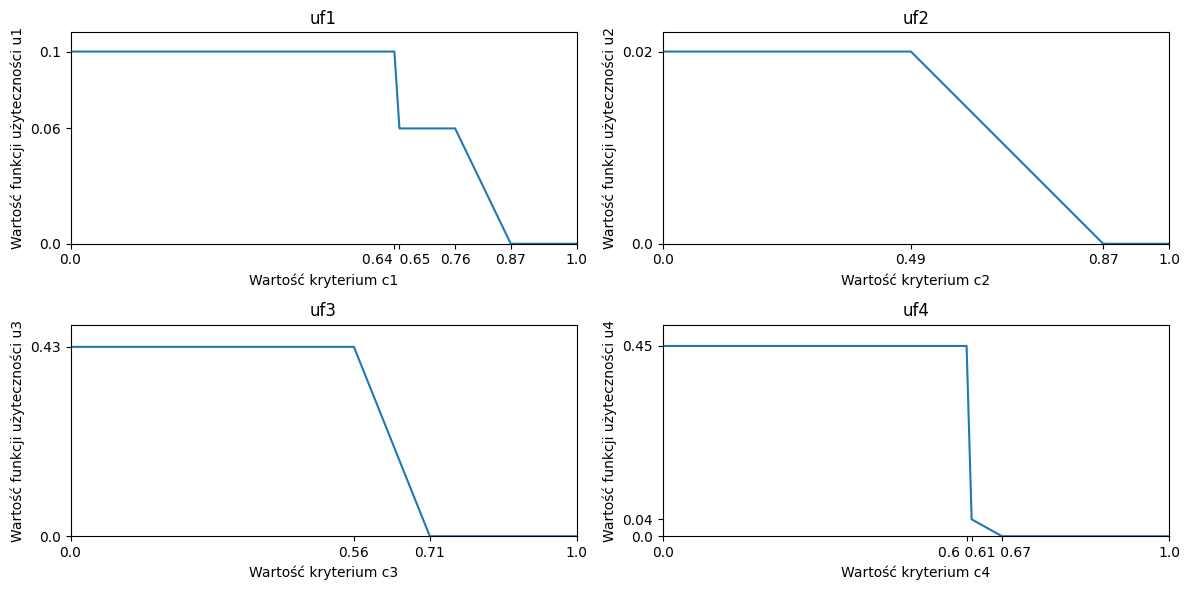

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Plot y1
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('uf1')
axs[0, 0].set_xlim(min(x), max(x))
axs[0, 0].set_xlabel('Wartość kryterium c1')
axs[0, 0].set_ylim(0, max(y1)+0.01)
axs[0, 0].set_ylabel('Wartość funkcji użyteczności u1')
axs[0, 0].set_xticks([0, 0.64, 0.65, 0.76, 0.87, 1.0])
axs[0, 0].set_xticklabels(['0.0', '0.64        ', '       0.65', '0.76', '0.87', '1.0'])
axs[0, 0].set_yticks([0, 0.06, 0.1])
axs[0, 0].set_yticklabels(['0.0', '0.06', '0.1'])

# Plot y2
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('uf2')
axs[0, 1].set_xlim(min(x), max(x))
axs[0, 1].set_xlabel('Wartość kryterium c2')
axs[0, 1].set_ylim(0, max(y2)+0.002)
axs[0, 1].set_ylabel('Wartość funkcji użyteczności u2')
axs[0, 1].set_xticks([0, 0.49, 0.87, 1.0])
axs[0, 1].set_xticklabels(['0.0', '0.49', '0.87', '1.0'])
axs[0, 1].set_yticks([0, 0.02])
axs[0, 1].set_yticklabels(['0.0', '0.02'])

# Plot y3
axs[1, 0].plot(x, y3)
axs[1, 0].set_title('uf3')
axs[1, 0].set_xlim(min(x), max(x))
axs[1, 0].set_xlabel('Wartość kryterium c3')
axs[1, 0].set_ylim(0, max(y3)+0.05)
axs[1, 0].set_ylabel('Wartość funkcji użyteczności u3')
axs[1, 0].set_xticks([0, 0.56, 0.71, 1.0])
axs[1, 0].set_xticklabels(['0.0', '0.56', '0.71', '1.0'])
axs[1, 0].set_yticks([0, 0.43])
axs[1, 0].set_yticklabels(['0.0', '0.43'])

# Plot y4
axs[1, 1].plot(x, y4)
axs[1, 1].set_title('uf4')
axs[1, 1].set_xlim(min(x), max(x))
axs[1, 1].set_xlabel('Wartość kryterium c4')
axs[1, 1].set_ylim(0, max(y4)+0.05)
axs[1, 1].set_ylabel('Wartość funkcji użyteczności u4')
axs[1, 1].set_xticks([0, 0.6, 0.61, 0.67, 1.0])
axs[1, 1].set_xticklabels(['0.0', '0.6        ', '    0.61', '      0.67', '1.0'])
axs[1, 1].set_yticks([0, 0.04, 0.45])
axs[1, 1].set_yticklabels(['0.0', '0.04', '0.45'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df['U'] = df.apply(lambda row: uf(row['C1'], row['C2'], row['C3'], row['C4']), axis=1)
df_sorted = df.sort_values('U', ascending=False)

In [20]:
df_sorted

,C1,C2,C3,C4,U
4,0.62,0.40,0.56,0.50,1.000000
7,0.64,0.44,0.54,0.54,1.000000
10,0.61,0.54,0.38,0.49,0.997368
1,0.66,0.55,0.45,0.49,0.956842
2,1.00,0.45,0.57,0.50,0.871333
16,0.68,0.40,0.65,0.60,0.702000
13,0.69,0.49,0.56,0.61,0.550000
21,0.32,0.83,0.00,0.94,0.532105
9,0.45,0.86,0.00,0.73,0.530526
18,0.35,0.91,0.00,0.98,0.530000
